In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from scipy.stats import ttest_ind
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('creditcard.csv', error_bad_lines=False)


<ipython-input-6-08f1fedcfe0f>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv('creditcard.csv', error_bad_lines=False)


In [ ]:
print(df.isnull().sum())


id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,1837,-0.239360,-0.032816,1.337402,-1.078488,0.139254,0.026610,0.663923,-0.117683,0.758727,...,-0.195314,-0.360128,-0.049362,1.110880,-0.316625,0.623381,0.539278,0.753367,21444.83,0.0
1838,1838,-0.278113,-0.328546,1.605265,-1.189190,0.250932,-0.175920,0.422143,-0.045159,0.242914,...,-0.064916,-0.126028,-0.056672,0.972923,-0.465923,1.538109,-0.362877,-0.272397,15261.19,0.0
1839,1839,0.945214,-0.246398,0.834602,0.251654,0.286694,0.423665,0.488289,-0.157201,0.037967,...,-0.167491,-0.455266,0.087848,0.144774,0.405273,-0.363627,-0.229677,-0.043711,14466.76,0.0
1840,1840,-0.377516,0.086543,0.986042,-1.086824,0.028806,-0.029134,0.507207,-0.013239,0.775357,...,-0.189287,-0.391209,0.004979,1.100809,-0.200951,0.636573,0.507318,0.750503,19340.56,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      1842 non-null   int64  
 1   V1      1842 non-null   float64
 2   V2      1842 non-null   float64
 3   V3      1842 non-null   float64
 4   V4      1842 non-null   float64
 5   V5      1842 non-null   float64
 6   V6      1842 non-null   float64
 7   V7      1842 non-null   float64
 8   V8      1842 non-null   float64
 9   V9      1842 non-null   float64
 10  V10     1842 non-null   float64
 11  V11     1841 non-null   float64
 12  V12     1841 non-null   float64
 13  V13     1841 non-null   float64
 14  V14     1841 non-null   float64
 15  V15     1841 non-null   float64
 16  V16     1841 non-null   float64
 17  V17     1841 non-null   float64
 18  V18     1841 non-null   float64
 19  V19     1841 non-null   float64
 20  V20     1841 non-null   float64
 21  V21     1841 non-null   float64
 22  

In [ ]:
df.describe()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,1842.000000,...,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000,1841.000000
mean,920.500000,0.260319,-0.392159,1.089120,-0.642841,0.290104,0.480131,0.530440,-0.160842,0.559875,...,-0.112051,-0.139818,-0.062423,0.149367,0.114081,0.038768,-0.189959,-0.115713,12105.484715,0.001086
std,531.883916,0.575708,0.421239,0.676338,0.625742,0.483194,0.673223,0.944349,0.199314,0.608968,...,0.248052,0.538673,0.370294,1.121838,0.674026,1.001276,0.411935,0.653243,6873.709752,0.032951
min,0.000000,-1.546398,-6.416685,-1.420525,-3.996094,-4.298320,-1.827680,-0.636962,-2.338449,-0.887904,...,-2.262451,-2.290720,-3.556660,-3.235133,-2.470559,-3.430118,-3.570752,-6.830490,59.190000,0.000000
25%,460.250000,-0.170149,-0.524446,0.607901,-0.937976,0.055390,0.071781,0.337643,-0.191746,0.224181,...,-0.194079,-0.523170,-0.208318,-0.605185,-0.326769,-0.682052,-0.298780,-0.160594,6213.110000,0.000000
50%,920.500000,0.027450,-0.349649,0.977353,-0.524541,0.200861,0.370232,0.470976,-0.144625,0.465827,...,-0.135596,-0.152763,-0.083425,0.218030,0.142718,0.058597,-0.214285,-0.048630,12077.210000,0.000000
75%,1380.750000,0.911741,-0.159553,1.483291,-0.212682,0.419148,0.709515,0.648215,-0.089277,0.784431,...,-0.067563,0.212962,0.043362,0.909018,0.566911,0.656889,-0.084349,0.107719,18200.470000,0.000000
max,1841.000000,1.423966,1.175983,4.324138,1.170756,5.774624,9.295606,37.922674,0.851832,6.852978,...,2.214882,1.952041,4.778495,2.751773,2.760370,5.555557,6.550638,9.736378,24017.920000,1.000000


In [ ]:
df.corr()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
id,1.000000,-0.063619,0.025266,-0.041136,-0.109809,-0.048897,-0.091915,0.028709,-0.012668,0.027170,...,-0.011525,-0.040077,-0.015862,0.012484,-0.017575,0.057956,0.039973,0.053092,0.005334,-0.020974
V1,-0.063619,1.000000,-0.157452,-0.388578,0.235175,-0.213783,-0.035409,-0.182889,0.121790,-0.111484,...,-0.109495,-0.103708,-0.092976,-0.001998,0.451251,-0.004004,-0.131424,0.090496,0.014509,-0.046333
V2,0.025266,-0.157452,1.000000,0.038925,0.028462,0.048754,-0.122523,-0.205785,-0.056748,0.045696,...,0.086796,-0.081901,0.001096,-0.020866,-0.171896,-0.043992,0.054615,-0.079994,0.018035,-0.031597
V3,-0.041136,-0.388578,0.038925,1.000000,0.140000,-0.058403,-0.044673,-0.070719,-0.027771,0.048690,...,0.009598,0.303389,-0.005922,0.077872,-0.312262,0.061410,-0.197826,-0.203625,-0.001182,-0.026218
V4,-0.109809,0.235175,0.028462,0.140000,1.000000,-0.092048,0.084216,0.073451,0.130212,-0.183502,...,-0.106778,0.037634,0.030000,0.017631,0.043839,-0.022093,-0.016161,0.113366,-0.020318,0.057359
V5,-0.048897,-0.213783,0.048754,-0.058403,-0.092048,1.000000,0.155550,-0.223453,0.103152,0.022132,...,0.013633,-0.127979,0.006450,0.035994,-0.047459,-0.131773,-0.144513,-0.176431,-0.009315,0.013340
V6,-0.091915,-0.035409,-0.122523,-0.044673,0.084216,0.155550,1.000000,0.281760,0.047985,0.009994,...,-0.017264,0.044593,-0.102534,-0.010768,0.069216,0.035225,0.086687,0.073306,0.013326,-0.037650
V7,0.028709,-0.182889,-0.205785,-0.070719,0.073451,-0.223453,0.281760,1.000000,-0.194513,-0.020012,...,-0.233796,0.063443,-0.104296,0.030859,-0.024933,0.019701,0.348896,0.209612,0.036223,-0.012499
V8,-0.012668,0.121790,-0.056748,-0.027771,0.130212,0.103152,0.047985,-0.194513,1.000000,-0.197352,...,-0.259968,0.056357,-0.029986,-0.006517,-0.001780,0.058689,0.018611,0.138857,-0.028645,0.028020
V9,0.027170,-0.111484,0.045696,0.048690,-0.183502,0.022132,0.009994,-0.020012,-0.197352,1.000000,...,0.040565,0.042400,-0.069033,-0.004802,0.123837,0.038039,0.087510,-0.236621,0.030742,-0.041795


In [ ]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,1837,-0.239360,-0.032816,1.337402,-1.078488,0.139254,0.026610,0.663923,-0.117683,0.758727,...,-0.195314,-0.360128,-0.049362,1.110880,-0.316625,0.623381,0.539278,0.753367,21444.83,0.0
1838,1838,-0.278113,-0.328546,1.605265,-1.189190,0.250932,-0.175920,0.422143,-0.045159,0.242914,...,-0.064916,-0.126028,-0.056672,0.972923,-0.465923,1.538109,-0.362877,-0.272397,15261.19,0.0
1839,1839,0.945214,-0.246398,0.834602,0.251654,0.286694,0.423665,0.488289,-0.157201,0.037967,...,-0.167491,-0.455266,0.087848,0.144774,0.405273,-0.363627,-0.229677,-0.043711,14466.76,0.0
1840,1840,-0.377516,0.086543,0.986042,-1.086824,0.028806,-0.029134,0.507207,-0.013239,0.775357,...,-0.189287,-0.391209,0.004979,1.100809,-0.200951,0.636573,0.507318,0.750503,19340.56,0.0


In [ ]:
df  = df.drop(columns='Amount')

In [ ]:
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,0.0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,0.0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,0.0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,0.0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,0.0


In [ ]:
#from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(df['Class'])

LabelEncoder()

In [ ]:
le.classes_

array([ 0.,  1., nan])

In [ ]:
le.transform(df['Class'])

array([0, 0, 0, ..., 0, 0, 2])

In [ ]:
for i in df.columns:
    print(i)
    df[i] = le.fit_transform(df[i])

id
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Class


In [ ]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0,314,561,1758,1591,691,1396,1041,1070,1288,...,1484,1106,1371,716,855,895,653,1370,469,0
1,1,1545,889,403,1019,1131,1002,649,1026,684,...,651,449,351,1449,461,974,1164,729,780,0
2,2,315,98,1528,989,502,1685,1581,1343,76,...,1682,1634,1703,1794,262,234,723,442,388,0
3,3,493,485,1536,357,1052,1632,1036,1479,94,...,287,817,1058,431,94,1666,602,1176,1281,0
4,4,388,1350,1402,998,618,1148,1401,336,1582,...,1623,1128,1712,620,989,378,1575,1508,1692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,1837,339,1656,1249,364,717,380,1415,1184,1334,...,1581,445,674,1056,1522,469,1348,1780,1785,0
1838,1838,280,977,1459,309,1057,161,715,1550,488,...,798,1384,944,1029,1423,337,1663,286,370,0
1839,1839,1437,1173,774,1745,1150,995,955,784,217,...,414,663,546,1459,837,1210,697,826,942,0
1840,1840,185,1747,918,360,404,305,1007,1620,1354,...,1601,494,633,1267,1513,594,1359,1773,1783,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1842 entries, 0 to 1841
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   id      1842 non-null   int64
 1   V1      1842 non-null   int64
 2   V2      1842 non-null   int64
 3   V3      1842 non-null   int64
 4   V4      1842 non-null   int64
 5   V5      1842 non-null   int64
 6   V6      1842 non-null   int64
 7   V7      1842 non-null   int64
 8   V8      1842 non-null   int64
 9   V9      1842 non-null   int64
 10  V10     1842 non-null   int64
 11  V11     1842 non-null   int64
 12  V12     1842 non-null   int64
 13  V13     1842 non-null   int64
 14  V14     1842 non-null   int64
 15  V15     1842 non-null   int64
 16  V16     1842 non-null   int64
 17  V17     1842 non-null   int64
 18  V18     1842 non-null   int64
 19  V19     1842 non-null   int64
 20  V20     1842 non-null   int64
 21  V21     1842 non-null   int64
 22  V22     1842 non-null   int64
 23  V23     1842 

In [ ]:
df = df.fillna(0)

In [ ]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0,314,561,1758,1591,691,1396,1041,1070,1288,...,1484,1106,1371,716,855,895,653,1370,469,0
1,1,1545,889,403,1019,1131,1002,649,1026,684,...,651,449,351,1449,461,974,1164,729,780,0
2,2,315,98,1528,989,502,1685,1581,1343,76,...,1682,1634,1703,1794,262,234,723,442,388,0
3,3,493,485,1536,357,1052,1632,1036,1479,94,...,287,817,1058,431,94,1666,602,1176,1281,0
4,4,388,1350,1402,998,618,1148,1401,336,1582,...,1623,1128,1712,620,989,378,1575,1508,1692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,1837,339,1656,1249,364,717,380,1415,1184,1334,...,1581,445,674,1056,1522,469,1348,1780,1785,0
1838,1838,280,977,1459,309,1057,161,715,1550,488,...,798,1384,944,1029,1423,337,1663,286,370,0
1839,1839,1437,1173,774,1745,1150,995,955,784,217,...,414,663,546,1459,837,1210,697,826,942,0
1840,1840,185,1747,918,360,404,305,1007,1620,1354,...,1601,494,633,1267,1513,594,1359,1773,1783,0


In [ ]:
for i in df.columns:

    df[i] = df[i].fillna(df[i].mean())

In [ ]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0,314,561,1758,1591,691,1396,1041,1070,1288,...,1484,1106,1371,716,855,895,653,1370,469,0
1,1,1545,889,403,1019,1131,1002,649,1026,684,...,651,449,351,1449,461,974,1164,729,780,0
2,2,315,98,1528,989,502,1685,1581,1343,76,...,1682,1634,1703,1794,262,234,723,442,388,0
3,3,493,485,1536,357,1052,1632,1036,1479,94,...,287,817,1058,431,94,1666,602,1176,1281,0
4,4,388,1350,1402,998,618,1148,1401,336,1582,...,1623,1128,1712,620,989,378,1575,1508,1692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,1837,339,1656,1249,364,717,380,1415,1184,1334,...,1581,445,674,1056,1522,469,1348,1780,1785,0
1838,1838,280,977,1459,309,1057,161,715,1550,488,...,798,1384,944,1029,1423,337,1663,286,370,0
1839,1839,1437,1173,774,1745,1150,995,955,784,217,...,414,663,546,1459,837,1210,697,826,942,0
1840,1840,185,1747,918,360,404,305,1007,1620,1354,...,1601,494,633,1267,1513,594,1359,1773,1783,0


In [ ]:
df.corr()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
id,1.000000,-0.080670,0.022699,-0.042500,-0.118788,-0.037374,-0.102722,0.005170,0.020102,0.037943,...,0.071942,-0.026051,-0.043346,-0.043516,0.013283,-0.022321,0.066081,0.032537,0.026842,0.020838
V1,-0.080670,1.000000,-0.376754,-0.368585,0.217096,-0.229030,-0.029227,-0.306015,-0.067640,-0.085145,...,-0.212486,-0.096481,-0.105645,-0.045367,0.004051,0.418582,-0.041765,-0.112395,0.011048,-0.058351
V2,0.022699,-0.376754,1.000000,0.116165,0.067881,0.337764,-0.086979,0.465673,-0.092885,-0.128929,...,0.090624,-0.066689,-0.113307,0.043144,0.017215,-0.341456,-0.055388,0.248053,0.111288,0.031045
V3,-0.042500,-0.368585,0.116165,1.000000,0.118372,-0.019195,0.088437,0.161384,-0.006577,-0.007792,...,0.045299,0.059262,0.267359,-0.024328,0.080270,-0.383743,0.047829,-0.017648,-0.008160,-0.036269
V4,-0.118788,0.217096,0.067881,0.118372,1.000000,-0.031261,0.169017,-0.012438,0.027672,-0.074524,...,-0.099624,0.046037,0.121295,0.037693,0.023867,0.120358,-0.200326,-0.034639,0.066795,0.009658
V5,-0.037374,-0.229030,0.337764,-0.019195,-0.031261,1.000000,0.116780,0.362572,-0.003395,-0.103402,...,0.151782,-0.127416,-0.117818,-0.138904,-0.195393,-0.142106,-0.143810,0.020168,-0.120077,-0.011035
V6,-0.102722,-0.029227,-0.086979,0.088437,0.169017,0.116780,1.000000,-0.206518,0.354243,0.084625,...,-0.030196,0.070050,0.115687,-0.156242,-0.278880,0.055221,-0.005835,0.009116,-0.024875,-0.043543
V7,0.005170,-0.306015,0.465673,0.161384,-0.012438,0.362572,-0.206518,1.000000,-0.360830,-0.143399,...,0.254362,-0.138260,0.013337,-0.084545,-0.018361,-0.291876,-0.083028,-0.051827,-0.094460,-0.021629
V8,0.020102,-0.067640,-0.092885,-0.006577,0.027672,-0.003395,0.354243,-0.360830,1.000000,-0.024708,...,-0.026569,0.071953,0.058480,0.055487,-0.079425,-0.053650,0.088115,0.204618,0.142429,0.042228
V9,0.037943,-0.085145,-0.128929,-0.007792,-0.074524,-0.103402,0.084625,-0.143399,-0.024708,1.000000,...,0.016647,-0.032052,0.040524,-0.098113,0.000964,0.136022,0.127492,0.010859,-0.120416,0.003464


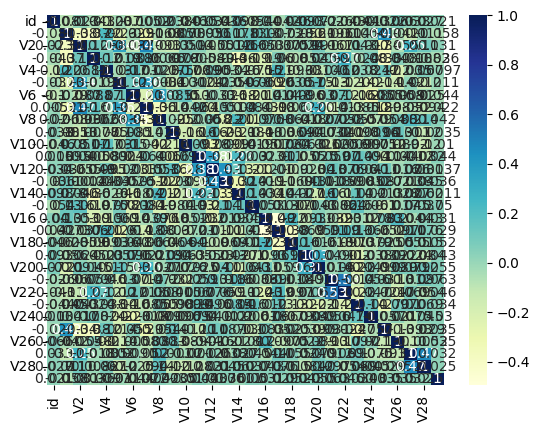

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
sns.set(rc = {'figure.figsize':(10,7)})
plt.show()

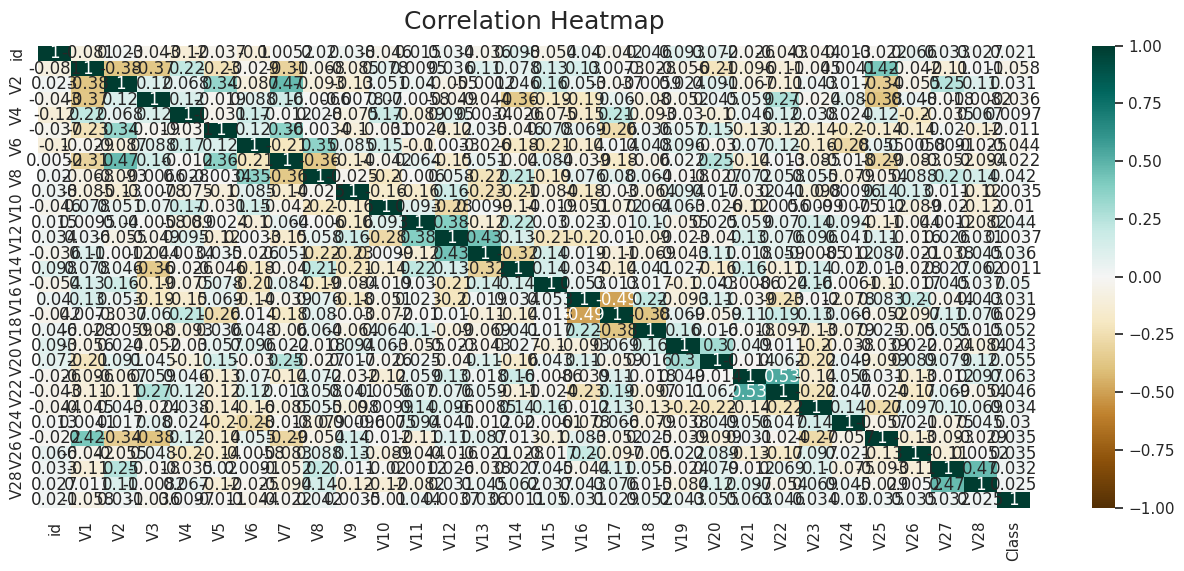

In [ ]:
#heatmap corr
#https://medium.com/@szabo.bibor/how-to-create-a-seaborn-correlation-heatmap-in-python-834c0686b88e

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.show()

In [ ]:
df.corrwith(df['Class'])

id       0.020838
V1      -0.058351
V2       0.031045
V3      -0.036269
V4       0.009658
V5      -0.011035
V6      -0.043543
V7      -0.021629
V8       0.042228
V9       0.003464
V10     -0.010491
V11      0.044141
V12      0.003655
V13      0.036346
V14      0.001097
V15      0.050148
V16      0.031342
V17      0.028956
V18      0.051596
V19      0.042795
V20      0.055340
V21      0.062721
V22      0.045634
V23      0.033876
V24      0.030109
V25      0.035164
V26      0.035161
V27      0.031844
V28      0.025201
Class    1.000000
dtype: float64

In [ ]:
df.corrwith(df['Class']).sort_values(ascending=True)

V1      -0.058351
V6      -0.043543
V3      -0.036269
V7      -0.021629
V5      -0.011035
V10     -0.010491
V14      0.001097
V9       0.003464
V12      0.003655
V4       0.009658
id       0.020838
V28      0.025201
V17      0.028956
V24      0.030109
V2       0.031045
V16      0.031342
V27      0.031844
V23      0.033876
V26      0.035161
V25      0.035164
V13      0.036346
V8       0.042228
V19      0.042795
V11      0.044141
V22      0.045634
V15      0.050148
V18      0.051596
V20      0.055340
V21      0.062721
Class    1.000000
dtype: float64

<Axes: >

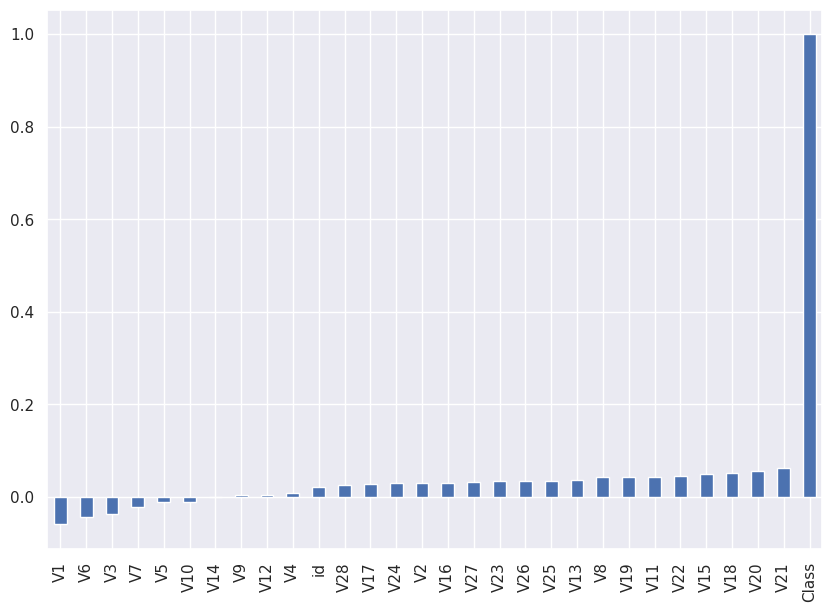

In [ ]:
df.corrwith(df['Class']).sort_values(ascending=True).plot(kind='bar')

<Axes: >

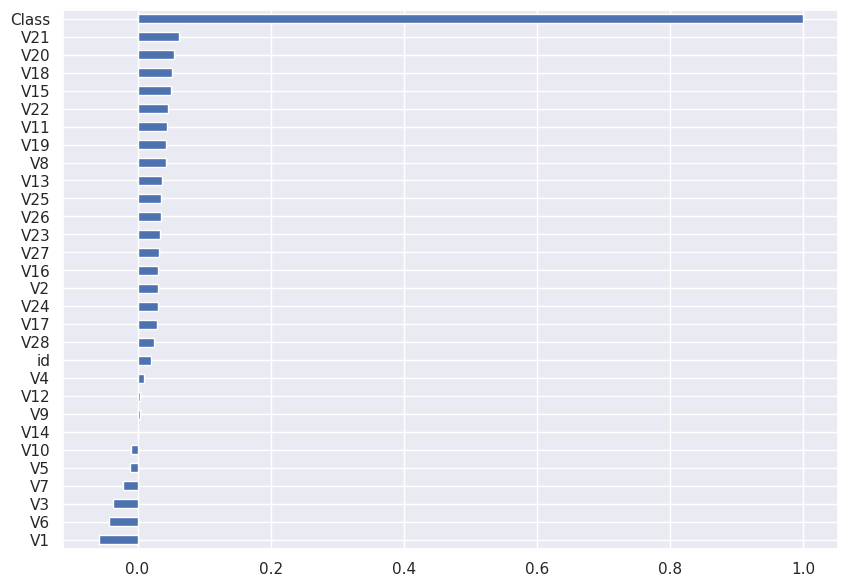

In [ ]:
df.corrwith(df['Class']).sort_values(ascending=True).plot(kind='barh')

<Axes: ylabel='Frequency'>

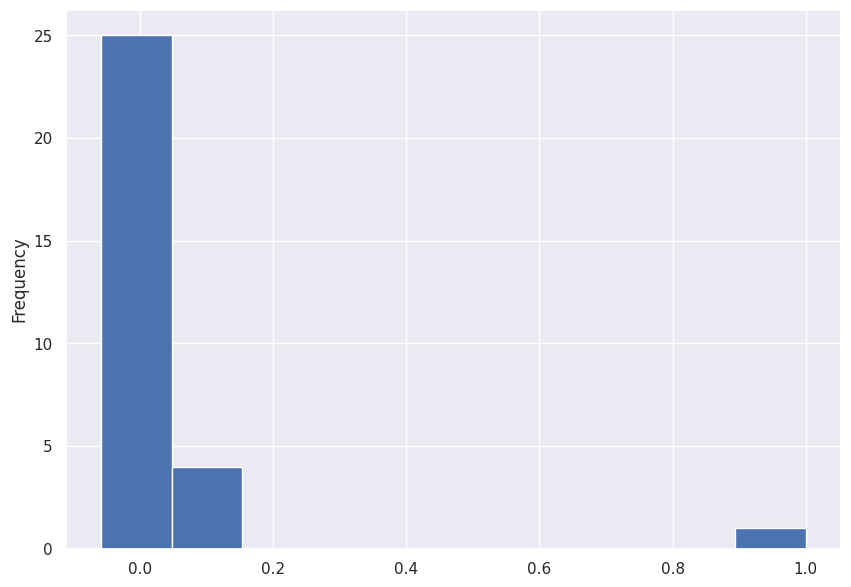

In [ ]:
df.corrwith(df['Class']).sort_values(ascending=True).plot(kind='hist')

<Axes: >

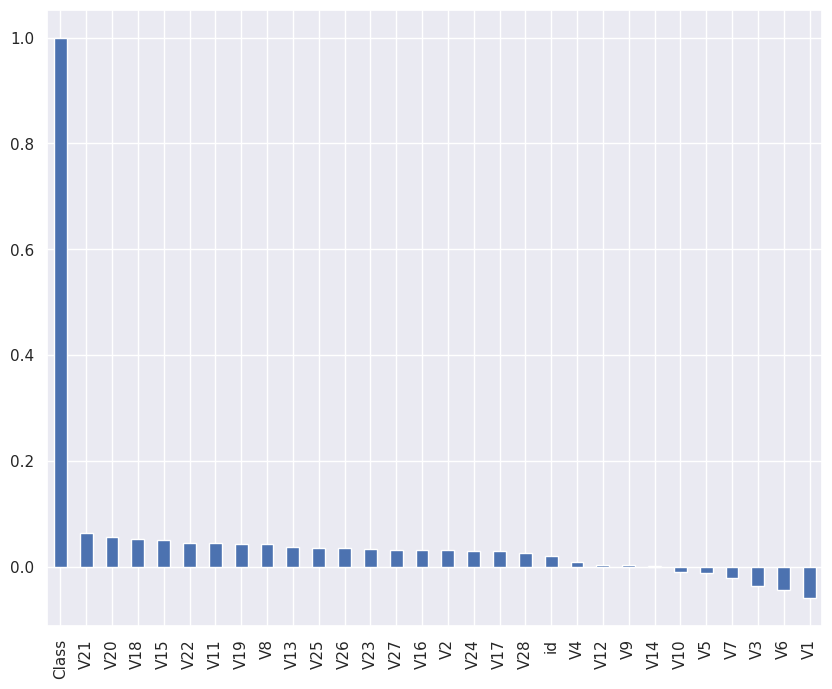

In [ ]:
df.corrwith(df['Class']).sort_values(ascending=False).plot(kind='bar',figsize=(10,8))

In [ ]:
df.Class.value_counts()

0    1839
1       2
2       1
Name: Class, dtype: int64

In [ ]:
y = df['Class']

In [ ]:
df.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [ ]:
df.columns[1:]

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')

In [ ]:
df[df.columns[1:]]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,314,561,1758,1591,691,1396,1041,1070,1288,1189,...,1484,1106,1371,716,855,895,653,1370,469,0
1,1545,889,403,1019,1131,1002,649,1026,684,785,...,651,449,351,1449,461,974,1164,729,780,0
2,315,98,1528,989,502,1685,1581,1343,76,1294,...,1682,1634,1703,1794,262,234,723,442,388,0
3,493,485,1536,357,1052,1632,1036,1479,94,980,...,287,817,1058,431,94,1666,602,1176,1281,0
4,388,1350,1402,998,618,1148,1401,336,1582,1585,...,1623,1128,1712,620,989,378,1575,1508,1692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,339,1656,1249,364,717,380,1415,1184,1334,1426,...,1581,445,674,1056,1522,469,1348,1780,1785,0
1838,280,977,1459,309,1057,161,715,1550,488,90,...,798,1384,944,1029,1423,337,1663,286,370,0
1839,1437,1173,774,1745,1150,995,955,784,217,1511,...,414,663,546,1459,837,1210,697,826,942,0
1840,185,1747,918,360,404,305,1007,1620,1354,1472,...,1601,494,633,1267,1513,594,1359,1773,1783,0


In [ ]:
X = df[df.columns[1:]]

In [ ]:
X

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,314,561,1758,1591,691,1396,1041,1070,1288,1189,...,1484,1106,1371,716,855,895,653,1370,469,0
1,1545,889,403,1019,1131,1002,649,1026,684,785,...,651,449,351,1449,461,974,1164,729,780,0
2,315,98,1528,989,502,1685,1581,1343,76,1294,...,1682,1634,1703,1794,262,234,723,442,388,0
3,493,485,1536,357,1052,1632,1036,1479,94,980,...,287,817,1058,431,94,1666,602,1176,1281,0
4,388,1350,1402,998,618,1148,1401,336,1582,1585,...,1623,1128,1712,620,989,378,1575,1508,1692,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1837,339,1656,1249,364,717,380,1415,1184,1334,1426,...,1581,445,674,1056,1522,469,1348,1780,1785,0
1838,280,977,1459,309,1057,161,715,1550,488,90,...,798,1384,944,1029,1423,337,1663,286,370,0
1839,1437,1173,774,1745,1150,995,955,784,217,1511,...,414,663,546,1459,837,1210,697,826,942,0
1840,185,1747,918,360,404,305,1007,1620,1354,1472,...,1601,494,633,1267,1513,594,1359,1773,1783,0


In [ ]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1837    0
1838    0
1839    0
1840    0
1841    2
Name: Class, Length: 1842, dtype: int64

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
le = LabelEncoder()
for i in df.columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
X = df.drop('Class',axis=1)
y = df['Class']

In [ ]:
### Removing features with low variance - Variance Threshold


In [ ]:
from sklearn.feature_selection import VarianceThreshold

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=.30)


vth = VarianceThreshold(threshold=0)  # as deafult threshold=0
vth.fit(X_train)
X_train_vth = X_train.iloc[:, vth.get_support()]

df1 = pd.DataFrame( {'Feature': X_train.columns,'Variance': vth.variances_,}).sort_values('Variance', ascending=True)
df1

,Feature,Variance
5,V5,1822.0
27,V27,1822.0
6,V6,1823.0
18,V18,1824.0
1,V1,1824.0
16,V16,1824.0
3,V3,1824.0
4,V4,1824.0
7,V7,1824.0
15,V15,1824.0


In [ ]:
#Select KBest for Classification Problems

Feature 0 : 1.912
Feature 1 : 3.531
Feature 2 : 1.344
Feature 3 : 1.276
Feature 4 : 3.272
Feature 5 : 0.521
Feature 6 : 2.624
Feature 7 : 0.516
Feature 8 : 1.676
Feature 9 : 2.022
Feature 10 : 3.017
Feature 11 : 1.842
Feature 12 : 3.965
Feature 13 : 1.517
Feature 14 : 4.178
Feature 15 : 2.316
Feature 16 : 1.512
Feature 17 : 1.528
Feature 18 : 2.461
Feature 19 : 1.818
Feature 20 : 2.989
Feature 21 : 3.962
Feature 22 : 1.955
Feature 23 : 1.484
Feature 24 : 1.538
Feature 25 : 1.494
Feature 26 : 1.488
Feature 27 : 1.487
Feature 28 : 1.657



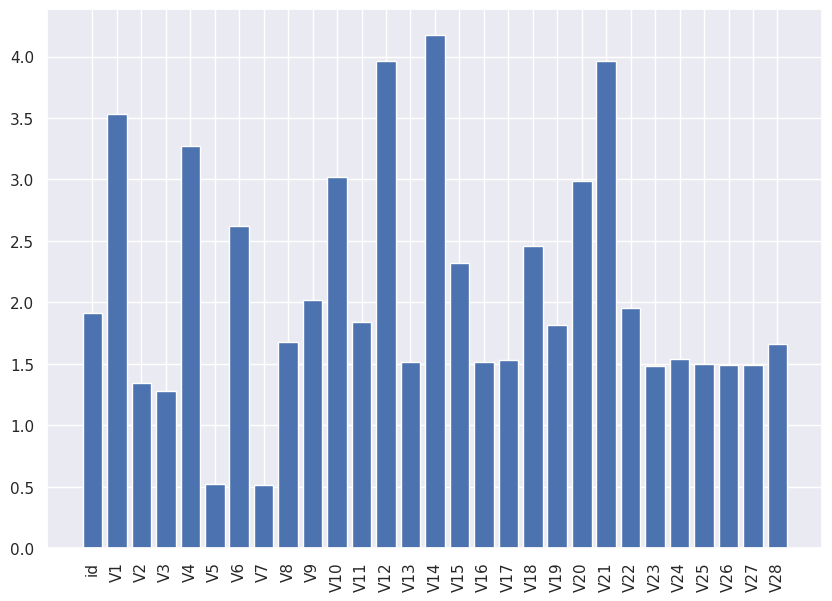

In [ ]:
from sklearn.feature_selection import SelectKBest,f_classif

Kbest_classif = SelectKBest(score_func=f_classif, k=6)   # score_func=f_regression, ,, for regreassion problem
Kbest_classif.fit(X_train, y_train)

# what are scores for the features
for i in range(len(Kbest_classif.scores_)):
    print(f'Feature {i} : {round(Kbest_classif.scores_[i],3)}')

print()

plt.bar([X_train.columns[i] for i in range(len(Kbest_classif.scores_))], Kbest_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

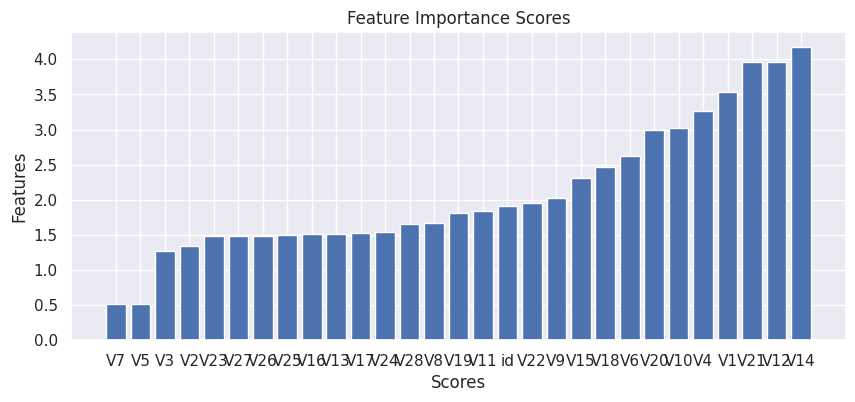

In [ ]:
data = sorted(list(zip([X_train.columns[i] for i in range(len(Kbest_classif.scores_))],Kbest_classif.scores_)),key=lambda x:x[1])

# Separate the data into two lists
features = [item[0] for item in data]
scores = [item[1] for item in data]

# Create a horizontal bar plot
plt.figure(figsize=(10, 4))
plt.bar(features, scores)
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()

In [ ]:
# transform training set , but we can pick by ourself
X_train_classif = Kbest_classif.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print()
print("X_train_selected.shape: {}".format(X_train_classif.shape))
print()
# transform test data
X_test_classif = Kbest_classif.transform(X_test)

X_train.shape: (1289, 29)

X_train_selected.shape: (1289, 6)



In [ ]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression(solver='liblinear', random_state=0)
lor.fit(X_train, y_train)

print(f'Score with all features: {round(lor.score(X_test, y_test),4)}')

lor.fit(X_train_classif, y_train)

print(f'Score with only selected features: {round(lor.score(X_test_classif, y_test),4)}')

#In this example, by using only 6 features of the dataset, we got not better score than by using whole features.

Score with all features: 0.9964
Score with only selected features: 1.0


Feature 0 : 0.01
Feature 1 : 0.004
Feature 2 : 0.0
Feature 3 : 0.0
Feature 4 : 0.001
Feature 5 : 0.0
Feature 6 : 0.002
Feature 7 : 0.0
Feature 8 : 0.0
Feature 9 : 0.001
Feature 10 : 0.001
Feature 11 : 0.0
Feature 12 : 0.006
Feature 13 : 0.0
Feature 14 : 0.002
Feature 15 : 0.0
Feature 16 : 0.0
Feature 17 : 0.0
Feature 18 : 0.0
Feature 19 : 0.01
Feature 20 : 0.0
Feature 21 : 0.002
Feature 22 : 0.0
Feature 23 : 0.0
Feature 24 : 0.0
Feature 25 : 0.0
Feature 26 : 0.0
Feature 27 : 0.0
Feature 28 : 0.0



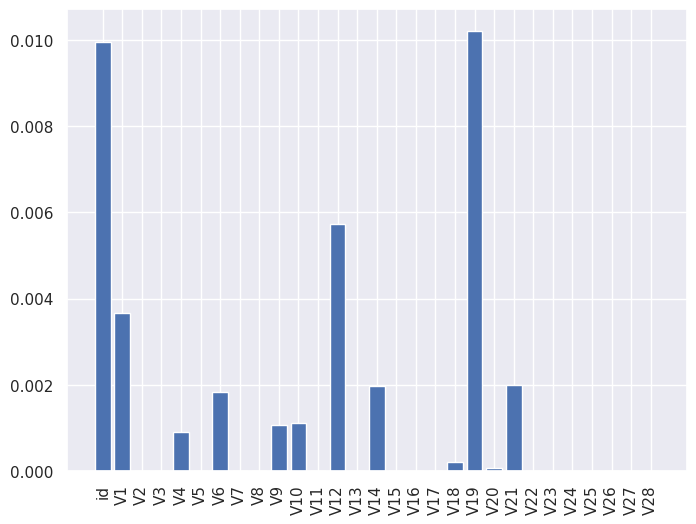

In [ ]:
from sklearn.feature_selection import mutual_info_classif

infogain_classif = SelectKBest(score_func=mutual_info_classif, k=6)

infogain_classif.fit(X_train, y_train)



# what are scores for the features
for i in range(len(infogain_classif.scores_)):
    print(f'Feature {i} : {round(infogain_classif.scores_[i],3)}')


print()

# plot the scores
plt.bar([X_train.columns[i] for i in range(len(infogain_classif.scores_))], infogain_classif.scores_)
plt.xticks(rotation=90)
plt.rcParams["figure.figsize"] = (8,6)
plt.show()

In [ ]:

from sklearn.feature_selection import SelectPercentile
percentile = SelectPercentile(percentile=50)
percentile.fit(X_train, y_train)

SelectPercentile(percentile=50)

In [ ]:
percentile.get_support()

array([ True,  True, False, False,  True, False,  True, False, False,
        True,  True,  True,  True, False,  True,  True, False, False,
        True, False,  True,  True,  True, False, False, False, False,
       False, False])

In [ ]:
X_train.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
#select features from anymodel

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
model_based_feature = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42),threshold="median")

model_based_feature.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier(random_state=42),
                threshold='median')

In [ ]:
model_based_feature.get_support()

array([False, False, False, False,  True, False, False, False, False,
       False,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True])

In [ ]:
X_train.columns

Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'],
      dtype='object')

In [ ]:
from sklearn.feature_selection import RFE
rfe_features = RFE(RandomForestClassifier(n_estimators=100, random_state=42),n_features_to_select=6)

rfe_features.fit(X_train, y_train)

rfe_features.get_support()  # how can we know which column is true

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False,  True, False, False,  True,
        True, False, False, False, False,  True, False, False, False,
       False, False])

In [ ]:
from sklearn.feature_selection import RFECV


rfecv = RFECV(estimator=RandomForestClassifier() , step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(X_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Optimal number of features : 2
Best features : Index(['V11', 'V12'], dtype='object')


In [ ]:
df_corr = pd.DataFrame(df.corrwith(df['Class']),columns='correlation'.split(','))

In [ ]:
df_corr

,correlation
id,0.020838
V1,-0.058351
V2,0.031045
V3,-0.036269
V4,0.009658
V5,-0.011035
V6,-0.043543
V7,-0.021629
V8,0.042228
V9,0.003464


In [ ]:
df_corr.style.bar(color='lightgreen',subset=['correlation'])

,correlation
id,0.020838
V1,-0.058351
V2,0.031045
V3,-0.036269
V4,0.009658
V5,-0.011035
V6,-0.043543
V7,-0.021629
V8,0.042228
V9,0.003464


<Axes: >

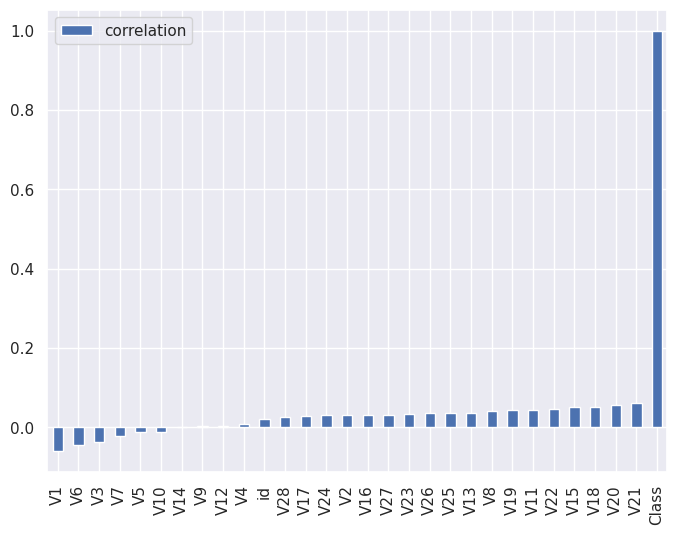

In [ ]:
df_corr.sort_values(by=['correlation'],ascending=True).plot(kind='bar')

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info   #now you know colum name and these value ,. make dataframe like above as i created also make plot

array([0.01188502, 0.00101744, 0.        , 0.        , 0.00142186,
       0.        , 0.00303841, 0.        , 0.        , 0.        ,
       0.00492796, 0.        , 0.00176904, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00033028, 0.01046162,
       0.00105805, 0.00217814, 0.00030844, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [ ]:
from sklearn.feature_selection import chi2
f_p_values=chi2(X_train,y_train)
f_p_values  #now you know colum name and these value ,. make dataframe like above as i created aslo make plot

(array([1184.37977131, 2176.32337749,  821.58978896,  761.93664813,
        1939.73295038,  315.56260904, 1579.20407722,  320.21736587,
        1041.5845204 , 1232.76023918, 1740.59324084, 1129.10762716,
        2331.15565366,  923.13770584, 2590.86485731, 1391.22607903,
         932.5361861 ,  938.54637345, 1511.73512844, 1124.56827174,
        1850.08596549, 2420.90307125, 1205.36422385,  876.87940751,
         932.27379578,  896.09485669,  925.89042561,  902.33217648,
        1024.20586265]),
 array([6.53432033e-258, 0.00000000e+000, 3.92684839e-179, 3.52824780e-166,
        0.00000000e+000, 2.99536741e-069, 0.00000000e+000, 2.92201537e-070,
        6.64959471e-227, 2.03946054e-268, 0.00000000e+000, 6.56740842e-246,
        0.00000000e+000, 3.49296439e-201, 0.00000000e+000, 7.92675434e-303,
        3.17936288e-203, 1.57486924e-204, 0.00000000e+000, 6.35480941e-245,
        0.00000000e+000, 0.00000000e+000, 1.81336174e-262, 3.87307594e-191,
        3.62507866e-203, 2.60300043e-195, 8

# Feature Extraction with PCA

Explained Variance Ratio: [0.09471732 0.08443784]
Principal Components (Eigenvectors):
[[ 0.04283186 -0.34700402  0.40752667  0.17214543 -0.1324757   0.33175503
  -0.12149648  0.44639601 -0.15306397 -0.11549951  0.03993071  0.02433115
  -0.18523431  0.00138613 -0.06488281  0.11646185  0.0908626  -0.17091795
   0.06256366  0.05343298  0.22908402 -0.13680816 -0.09180995  0.00146996
  -0.01628504 -0.34734099  0.0233721   0.06223754 -0.0127055 ]
 [-0.0615346  -0.26165731  0.06506944  0.38401007  0.1820253  -0.04973996
   0.17965051  0.04861947  0.05837484  0.0946597   0.00825772 -0.02426876
   0.09700281 -0.00615896 -0.20982223 -0.16080188 -0.40347243  0.35437514
  -0.21245682  0.05961005  0.05356779  0.23130403  0.39295913 -0.04750723
   0.05887867 -0.18479775 -0.12255843  0.09788799  0.03351112]]
Transformed Data (First 2 components):
[[ 224.81506614 1263.92547106]
 [-421.32752397 -931.53293545]
 [ 175.08692329 1540.70200303]
 ...
 [-115.76729158 -717.43522898]
 [ 791.6302368   -73.83021

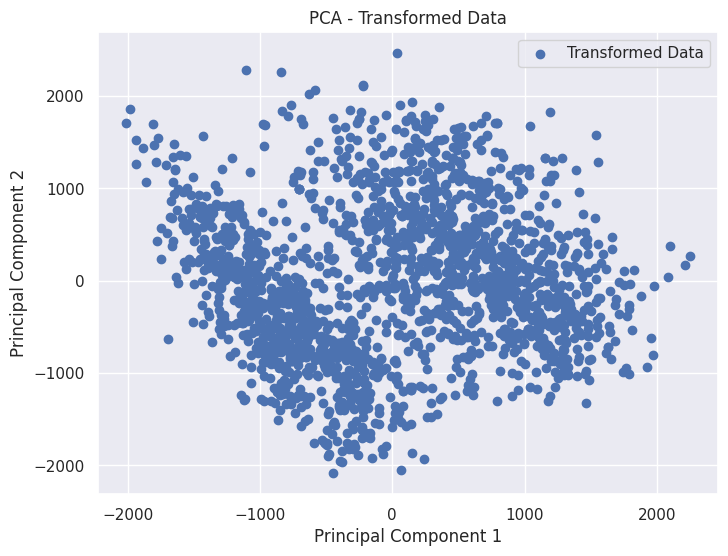

<Figure size 800x600 with 0 Axes>

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

# Create a PCA instance with the desired number of components
n_components = 2
pca = PCA(n_components=n_components)

# Fit the PCA model to the data and transform the data
X_pca = pca.fit_transform(X)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Print the principal components (eigenvectors)
print("Principal Components (Eigenvectors):")
print(pca.components_)

# Print the transformed data
print("Transformed Data (First", n_components, "components):")
print(X_pca)

# Visualize the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='b', marker='o', label='Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Transformed Data')
plt.legend()
plt.grid(True)
plt.show()
plt.savefig("PCA Plot.pdf", format="pdf",dpi=300)

Column Names: Index(['id', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class'],
      dtype='object')


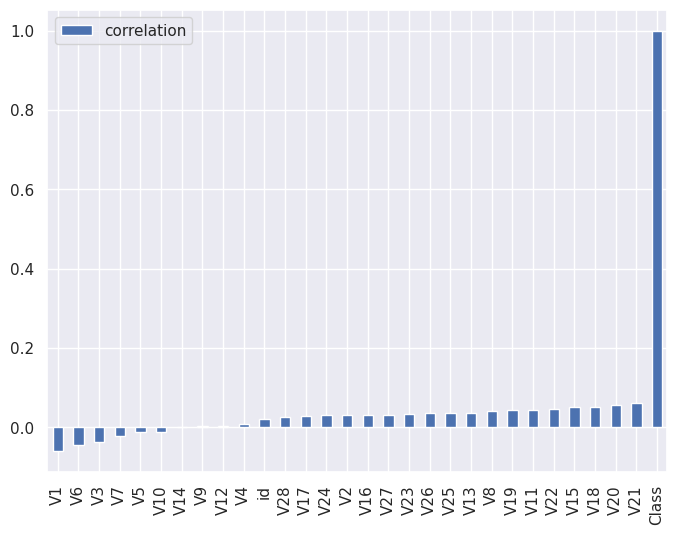

<Figure size 800x600 with 0 Axes>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named df
print("Column Names:", df.columns)

# Specify the correct target variable for correlation analysis
target_variable = 'Class'  # Replace 'Class' with the actual target variable

df_corr = pd.DataFrame(df.corrwith(df[target_variable]), columns=['correlation'])
df_corr.sort_values(by=['correlation'], ascending=True).plot(kind='bar')
plt.show()
plt.savefig("Correlation Plot.pdf", format="pdf", dpi=300)


#check feature extration using genetic algorithm

##Define the Genetic Algorithm Parameters:


In [ ]:
import random
import numpy as np
import pandas as pd

# Placeholder functions, replace these with your actual implementations
def fitness(individual_features):
    # Evaluate the fitness of an individual feature set
    # Replace this with your actual fitness evaluation
    return np.sum(individual_features)

def crossover(parent1, parent2):
    # Implement crossover between two parents
    # Replace this with your actual crossover logic
    crossover_point = random.randint(0, len(parent1))
    child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
    child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
    return child1, child2

def mutate(individual, mutation_rate):
    # Implement mutation for an individual
    # Replace this with your actual mutation logic
    mutation_indices = np.where(np.random.rand(len(individual)) < mutation_rate)
    individual[mutation_indices] = 1 - individual[mutation_indices]  # Flip bits
    return individual

def model_performance(X_subset, y):
    # Train your machine learning model and return its performance
    # Replace this with your actual model training and evaluation
    return np.mean(X_subset)  # Replace this line with actual performance calculation

# Genetic Algorithm Main Loop:
num_generations = 10
population_size = 20
crossover_rate = 0.8
mutation_rate = 0.1

# Assuming X_train is a DataFrame and y_train is a Series or array
X_train = pd.DataFrame(np.random.rand(100, 30), columns=[f'feature_{i}' for i in range(30)])
y_train = np.random.randint(0, 2, 100)

# Initialize a random population of feature sets
population = np.random.randint(0, 2, size=(population_size, X_train.shape[1]))

for generation in range(num_generations):
    # Evaluate fitness
    fitness_scores = [fitness(individual) for individual in population]

    # Select individuals for crossover using tournament selection
    selected_indices = np.random.choice(np.arange(population_size), size=population_size, replace=True)

    # Apply crossover and mutation
    new_population = []
    for i in range(0, population_size, 2):
        parent1 = population[selected_indices[i]]
        parent2 = population[selected_indices[i + 1]]

        # Crossover
        if random.random() < crossover_rate:
            child1, child2 = crossover(parent1, parent2)
        else:
            child1, child2 = parent1.copy(), parent2.copy()

        # Mutation
        child1 = mutate(child1, mutation_rate)
        child2 = mutate(child2, mutation_rate)

        new_population.extend([child1, child2])

    population = np.array(new_population)

    # Select the best individual of the current generation
    best_individual_index = np.argmax(fitness_scores)
    best_individual = population[best_individual_index]

    # Use the best individual's features for model training
    selected_features = X_train.columns[best_individual == 1]
    X_subset = X_train[selected_features]

    # Train your machine learning model using the selected features
    model_perf = model_performance(X_subset, y_train)

    print(f"Generation {generation + 1}, Best Fitness: {fitness_scores[best_individual_index]}, Model Performance: {model_perf}")


Generation 1, Best Fitness: 20, Model Performance: feature_0     0.520237
feature_2     0.492982
feature_5     0.529667
feature_9     0.418504
feature_11    0.501595
feature_14    0.497265
feature_15    0.470605
feature_16    0.485478
feature_17    0.524186
feature_18    0.501633
feature_20    0.447888
feature_22    0.532722
feature_24    0.516651
feature_25    0.505936
feature_28    0.512700
feature_29    0.488639
dtype: float64
Generation 2, Best Fitness: 21, Model Performance: feature_0     0.520237
feature_5     0.529667
feature_6     0.516507
feature_7     0.482471
feature_9     0.418504
feature_12    0.518668
feature_14    0.497265
feature_15    0.470605
feature_16    0.485478
feature_17    0.524186
feature_20    0.447888
feature_24    0.516651
feature_25    0.505936
feature_26    0.531981
feature_28    0.512700
dtype: float64
Generation 3, Best Fitness: 23, Model Performance: feature_1     0.517324
feature_2     0.492982
feature_4     0.480417
feature_5     0.529667
feature_7   

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/